<a href="https://colab.research.google.com/github/regitazakia/msads-uchi/blob/main/fraud_BCA_Regita_Zakia_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dfTrain = pd.read_csv('fraud_train.csv')
# pd.set_option('display.max_columns', None)
dfTrain.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


In [ ]:
dfTrain.drop(['X', 'id_tanggal_transaksi_awal','tanggal_transaksi_awal', 'id_merchant', 'nama_merchant', 'nama_transaksi',
             'nama_negara', 'pemilik_mesin', 'nama_channel', 'flag_transaksi_finansial',
              'status_transaksi', 'bank_pemilik_kartu'],
            axis = 1, inplace = True)

In [ ]:
dfTrain.head()

,tipe_kartu,tipe_mesin,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,lokasi_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,111,2605127,26,2200000.0,96,265,4137,193955,4,2,9,1.332293e+06,9750000.0,10000.0,2.73,0
1,111,-3,156,2500000.0,96,121,1264,73140,2,1,8,1.369048e+06,10000000.0,30000.0,2.33,1
2,2,-3,156,1200000.0,96,101,1283,140216,3,1,8,1.552346e+07,100000000.0,41804.0,2.40,0
3,103,2806174,58,320000.0,96,239,7049,155117,3,2,4,7.117647e+05,6884408.0,10000.0,1.98,0
4,0,2334932,26,150000.0,96,69,3425,143339,3,2,9,6.179683e+05,2500000.0,100000.0,1.46,0


1. X (Multinomial Variable)
2. id_tanggal_transaksi_awal (Multinomial variable)
3. tanggal_transaksi_awal (Multinomial variable)
4. tipe_kartu (Multinomial variable)
5. id_merchant (Multinomial variable)
6. nama_merchant (Multinomial variable)
7. tipe_mesin (Multinomial variable)
8. tipe_transaksi (Multinomial variable)
9. nama_transaksi (Multinomial variable)
10. nilai_transaksi (Continuous variable)
11. id_negara ((Multinomial variable))
12. nama_negara (Multinomial variable)
13. nama_kota (Multinomial variable)
14. lokasi_mesin (Multinomial variable)
15. pemilik_mesin (Multinomial variable)
16. waktu_transaksi (Continuous variable)
17. kuartal_transaksi (Multinomial variable)
18. kepemilikan_kartu (Binary variable)
19. nama_channel (Multinomial variable)
20. id_channel (Multinomial variable)
21. flag_transaksi_finansial (1 category variable)
22. status_transaksi (1 category variable)
23. bank_pemilik_kartu (1 category variable)
24. rata_rata_nilai_transaksi (continuous variable)
25. maksimum_nilai_transaksi (continuous variable)
26. minimum_nilai_transaksi (continuous variable)
27. rata_rata_jumlah_transaksi (continuous variable)
28. flag_transaksi_fraud (binary variable)



In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
tipe_kartu                    13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu             13125 non-null int64
id_channel                    13125 non-null int64
rata_rata_nilai_transaksi     13104 non-null float64
maksimum_nilai_transaksi      13104 non-null float64
minimum_nilai_transaksi       13104 non-null float64
rata_rata_jumlah_transaksi    13104 non-null float64
flag_transaksi_fraud          13125 non-null int64
dtypes: float64(5), int64(11)
memory usage: 1.6 MB


![image.png](attachment:image.png)

## EDA

In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
tipe_kartu                    13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu             13125 non-null int64
id_channel                    13125 non-null int64
rata_rata_nilai_transaksi     13104 non-null float64
maksimum_nilai_transaksi      13104 non-null float64
minimum_nilai_transaksi       13104 non-null float64
rata_rata_jumlah_transaksi    13104 non-null float64
flag_transaksi_fraud          13125 non-null int64
dtypes: float64(5), int64(11)
memory usage: 1.6 MB


In [ ]:
for i in ['tipe_kartu', 'tipe_mesin', 'tipe_transaksi', 'id_negara','nama_kota', 'lokasi_mesin', 'kuartal_transaksi',
 'kepemilikan_kartu', 'id_channel']:
    dfTrain[i] = dfTrain[i].astype('object')

In [ ]:
dfTrain.describe()

,nilai_transaksi,waktu_transaksi,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,1.312500e+04,13125.000000,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,13125.000000
mean,1.315219e+06,138895.669638,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,0.069333
std,2.838050e+06,47872.569599,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,0.254030
min,1.000000e+00,47.000000,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,2.000000e+05,102622.000000,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,5.700000e+05,140707.000000,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,0.000000
75%,1.250000e+06,175420.000000,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,7.500000e+07,235914.000000,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


In [ ]:
dfTrain.describe(exclude = 'number')

,tipe_kartu,tipe_mesin,tipe_transaksi,id_negara,nama_kota,lokasi_mesin,kuartal_transaksi,kepemilikan_kartu,id_channel
count,13125,13125,13125,13125,13125,13125,13125,13125,13125
unique,14,5341,20,13,229,5814,4,2,4
top,111,-3,26,96,128,600,3,2,9
freq,4846,883,3575,13081,5404,21,5224,12236,10418


In [ ]:
listItem = []

for col in dfTrain.columns:
    listItem.append([col, dfTrain[col].dtype, dfTrain[col].isna().sum(), round((dfTrain[col].isna().sum())/len(dfTrain[col])),
                    dfTrain[col].nunique(), list(dfTrain[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,tipe_kartu,object,0,0.0,14,[0]
1,tipe_mesin,object,0,0.0,5341,[2094787]
2,tipe_transaksi,object,0,0.0,20,[159]
3,nilai_transaksi,float64,0,0.0,1425,[101613.0]
4,id_negara,object,0,0.0,13,[96]
5,nama_kota,object,0,0.0,229,[89]
6,lokasi_mesin,object,0,0.0,5814,[4742]
7,waktu_transaksi,int64,0,0.0,7952,[113426]
8,kuartal_transaksi,object,0,0.0,4,[1]
9,kepemilikan_kartu,object,0,0.0,2,[1]


In [ ]:
dfTrain['flag_transaksi_fraud'].value_counts()

0    12215
1      910
Name: flag_transaksi_fraud, dtype: int64

In [ ]:
dfTrain['rata_rata_nilai_transaksi'] = dfTrain[['nilai_transaksi',
                                                'rata_rata_nilai_transaksi']].apply(lambda x: x['nilai_transaksi'] if pd.isna(x['rata_rata_nilai_transaksi']) else x['rata_rata_nilai_transaksi'],
                                                                                                       axis = 1)

In [ ]:
dfTrain['minimum_nilai_transaksi'] = dfTrain[['nilai_transaksi',
                                                'minimum_nilai_transaksi']].apply(lambda x: x['nilai_transaksi'] if pd.isna(x['minimum_nilai_transaksi']) else x['minimum_nilai_transaksi'],
                                                                                                       axis = 1)

In [ ]:
dfTrain['maksimum_nilai_transaksi'] = dfTrain[['nilai_transaksi',
                                                'maksimum_nilai_transaksi']].apply(lambda x: x['nilai_transaksi'] if pd.isna(x['maksimum_nilai_transaksi']) else x['maksimum_nilai_transaksi'],
                                                                                                       axis = 1)

In [ ]:
dfTrain['rata_rata_jumlah_transaksi'].fillna(1, inplace = True)

In [ ]:
dfTrain[dfTrain['minimum_nilai_transaksi'].isna()]

,tipe_kartu,tipe_mesin,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,lokasi_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud


In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
categorical_columns = dfTrain.select_dtypes('object').columns

In [ ]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramers.append(cramers_v(dfTrain['flag_transaksi_fraud'], dfTrain[i]))

In [ ]:
res = pd.DataFrame(data = [categorical_columns, cramers]
             ).T
res.columns = ['Column', 'Cramers_V']
res.sort_values(by = 'Cramers_V', ascending = False)

,Column,Cramers_V
8,id_channel,0.342861
2,tipe_transaksi,0.3418
7,kepemilikan_kartu,0.339915
5,lokasi_mesin,0.31959
4,nama_kota,0.288062
3,id_negara,0.0695649
0,tipe_kartu,0.0581797
6,kuartal_transaksi,0.0446847
1,tipe_mesin,0


nilai_transaksi
Correlation Ratio: 0.10129579898836834
Not-Normal Distribution
Skewness: 9.60436855721867, Kurtosis 140.43708750633542


C:\Users\MSI\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


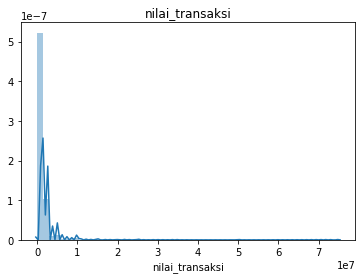



waktu_transaksi
Correlation Ratio: 0.03929372769953314
Not-Normal Distribution
Skewness: -0.2170763505985012, Kurtosis -0.4579989132630673


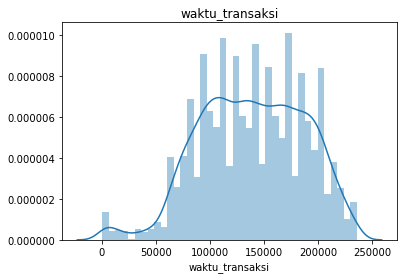



rata_rata_nilai_transaksi
Correlation Ratio: 0.04037701594560865
Not-Normal Distribution
Skewness: 5.371530198300946, Kurtosis 49.53398301351733


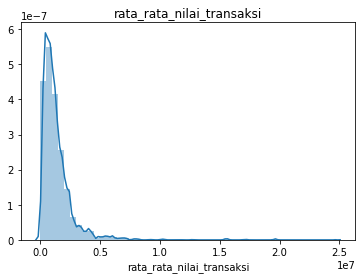



maksimum_nilai_transaksi
Correlation Ratio: 0.0142162221027146
Not-Normal Distribution
Skewness: 2.750055886452236, Kurtosis 8.504596885856383


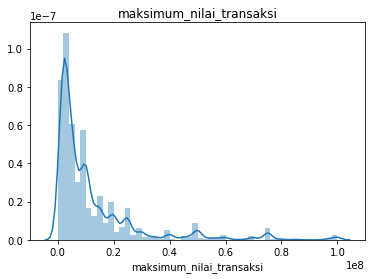



minimum_nilai_transaksi
Correlation Ratio: 0.06981987984523631
Not-Normal Distribution
Skewness: 98.72685280473583, Kurtosis 10637.861506673888


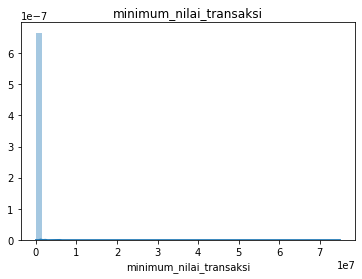



rata_rata_jumlah_transaksi
Correlation Ratio: 0.05718497576698442
Not-Normal Distribution
Skewness: 5.144820462175636, Kurtosis 48.94119600965223


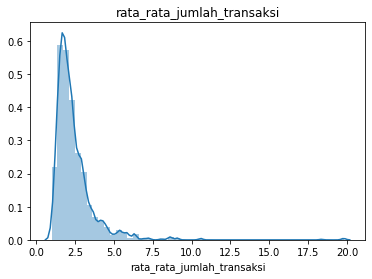



flag_transaksi_fraud
Correlation Ratio: 1.0
Not-Normal Distribution
Skewness: 3.390807498282994, Kurtosis 9.497575490412173


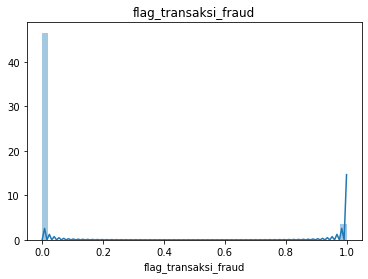

In [ ]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in dfTrain.select_dtypes(exclude = 'object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(dfTrain['flag_transaksi_fraud'], dfTrain[i])))
    if shapiro(dfTrain[i])[1] < 0.05:
        print('Not-Normal Distribution')
    else:
        print('Normal Distribution')

    print('Skewness: {}, Kurtosis {}'.format(skew(dfTrain[i]), kurtosis(dfTrain[i])))
    sns.distplot(dfTrain[i])
    plt.title(i)
    plt.show()
    print('\n')


## Hypothesis Testing

In [ ]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(dfTrain['flag_transaksi_fraud'], dfTrain[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')

In [ ]:
res = pd.DataFrame(data = [categorical_columns, chi2_check]
             ).T
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,tipe_kartu,Reject Null Hypothesis
1,tipe_mesin,Fail to Reject Null Hypothesis
2,tipe_transaksi,Reject Null Hypothesis
3,id_negara,Reject Null Hypothesis
4,nama_kota,Reject Null Hypothesis
5,lokasi_mesin,Reject Null Hypothesis
6,kuartal_transaksi,Reject Null Hypothesis
7,kepemilikan_kartu,Reject Null Hypothesis
8,id_channel,Reject Null Hypothesis


In [ ]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(dfTrain[i])
    bon_p_value = 0.05/dfTrain[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(dfTrain['flag_transaksi_fraud'], dummies[series]))[1] < bon_p_value:
            check['{}+{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'


In [ ]:
res_chi = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi.columns = ['Pair', 'Hypothesis']
res_chi

,Pair,Hypothesis
0,tipe_kartu+0,Fail to Reject Null Hypothesis
1,tipe_kartu+1,Fail to Reject Null Hypothesis
2,tipe_kartu+2,Fail to Reject Null Hypothesis
3,tipe_kartu+3,Fail to Reject Null Hypothesis
4,tipe_kartu+4,Reject Null Hypothesis
...,...,...
6095,kepemilikan_kartu+2,Reject Null Hypothesis
6096,id_channel+3,Fail to Reject Null Hypothesis
6097,id_channel+4,Reject Null Hypothesis
6098,id_channel+8,Reject Null Hypothesis


In [ ]:
res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']

,Pair,Hypothesis
4,tipe_kartu+4,Reject Null Hypothesis
8,tipe_kartu+93,Reject Null Hypothesis
14,tipe_transaksi+26,Reject Null Hypothesis
15,tipe_transaksi+58,Reject Null Hypothesis
17,tipe_transaksi+148,Reject Null Hypothesis
19,tipe_transaksi+156,Reject Null Hypothesis
20,tipe_transaksi+158,Reject Null Hypothesis
21,tipe_transaksi+159,Reject Null Hypothesis
26,tipe_transaksi+238,Reject Null Hypothesis
28,tipe_transaksi+385,Reject Null Hypothesis


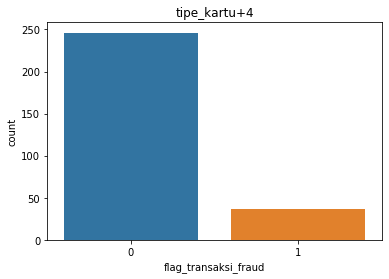

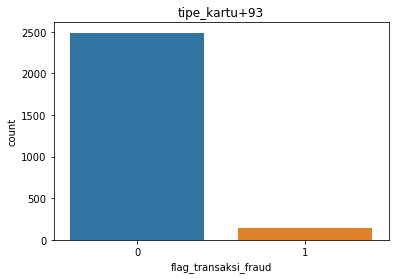

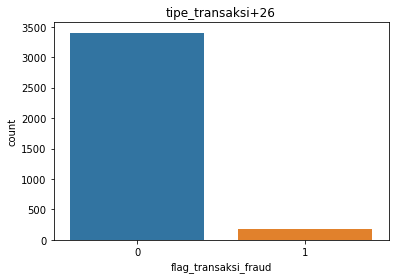

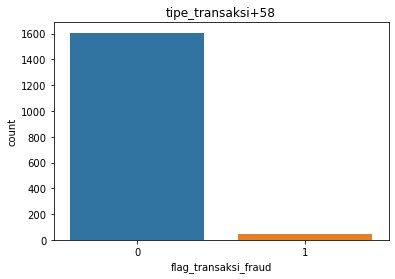

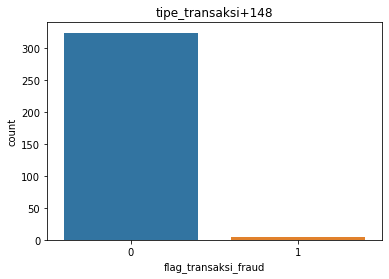

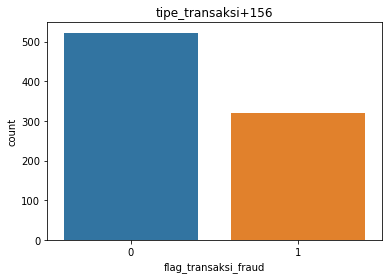

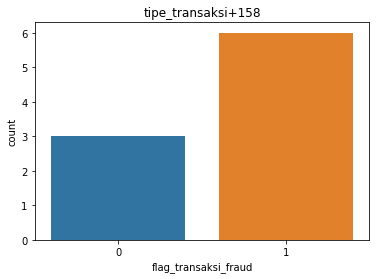

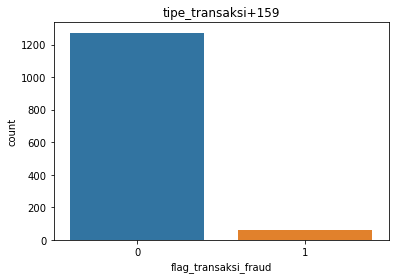

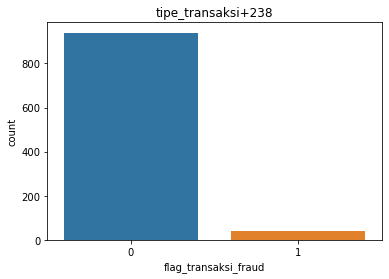

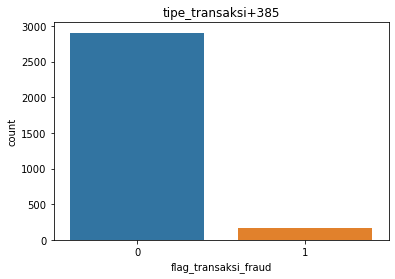

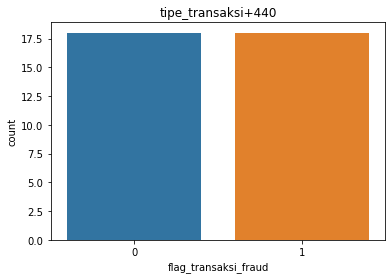

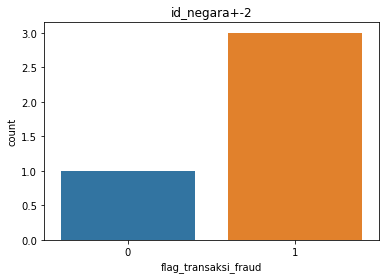

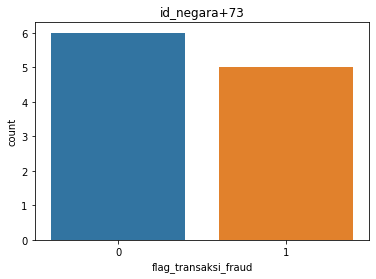

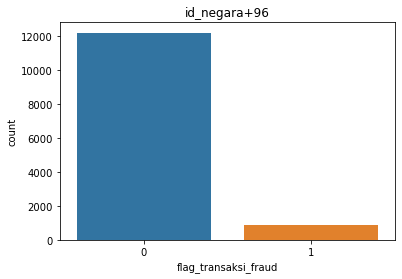

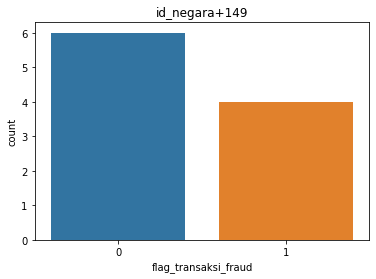

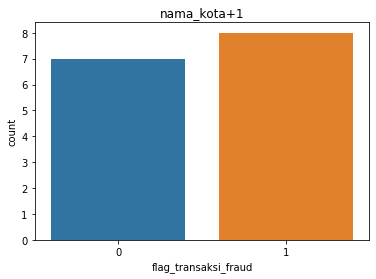

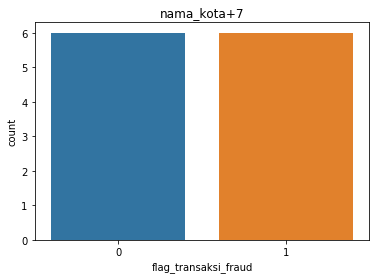

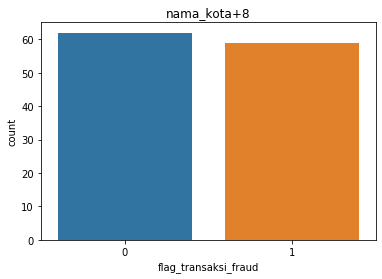

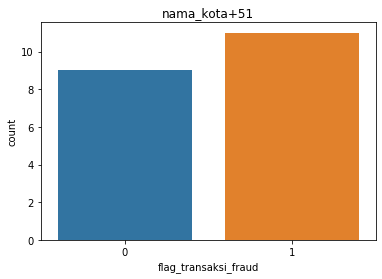

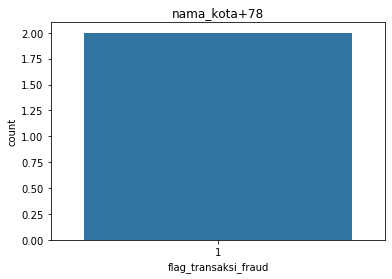

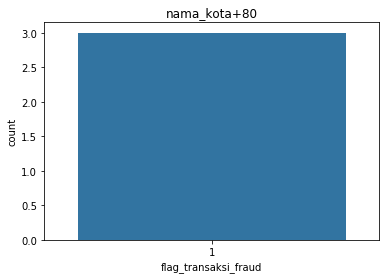

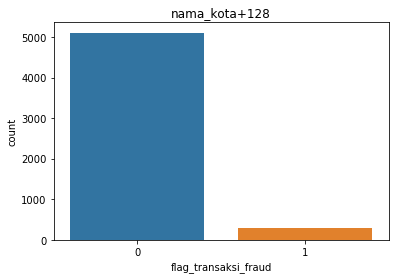

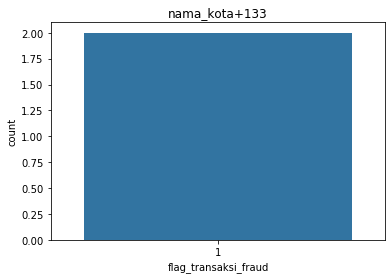

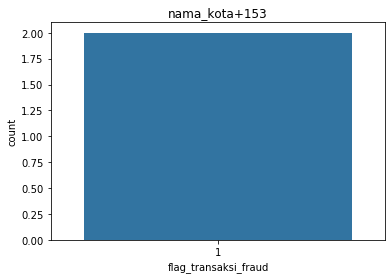

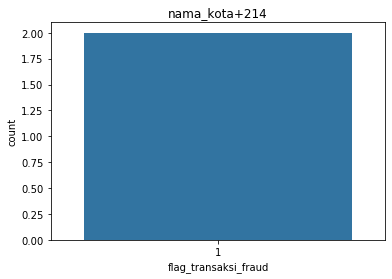

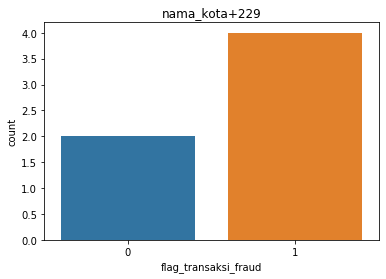

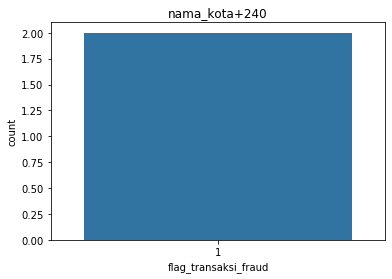

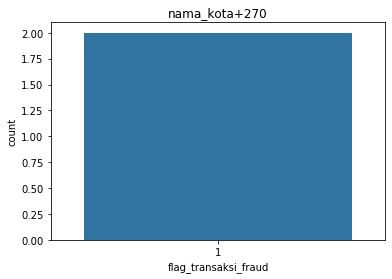

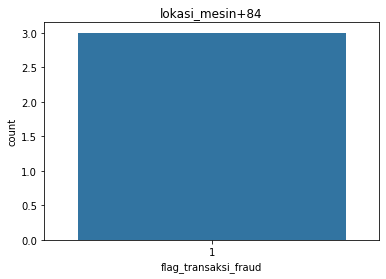

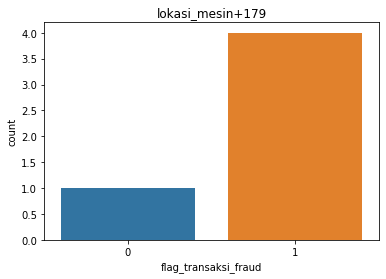

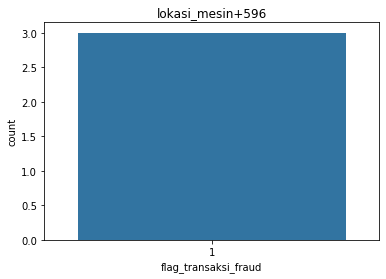

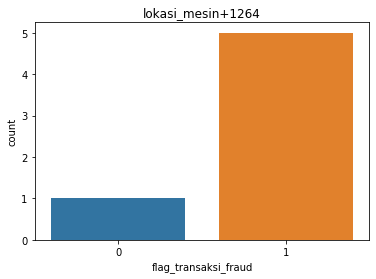

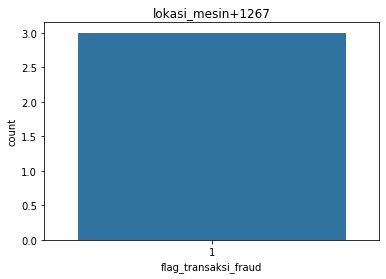

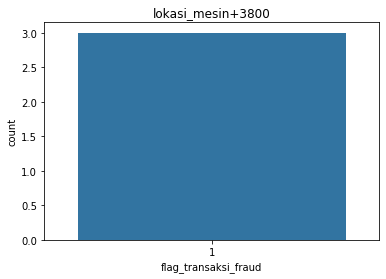

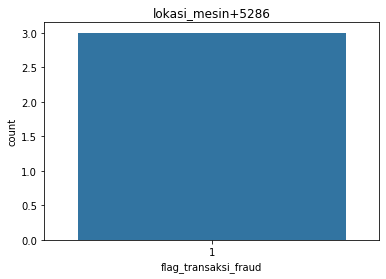

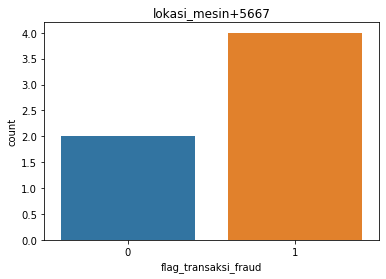

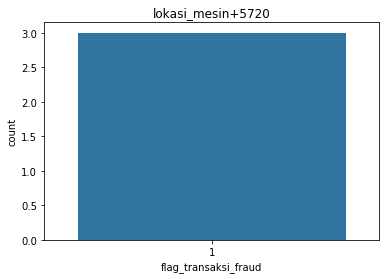

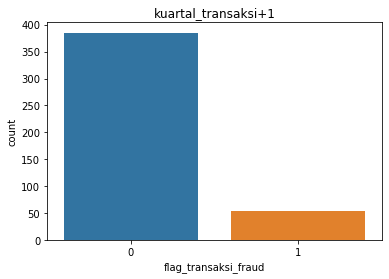

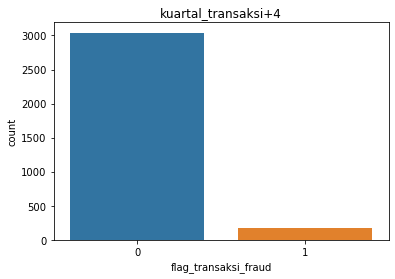

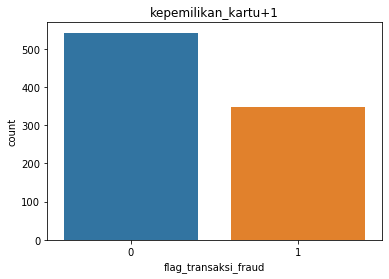

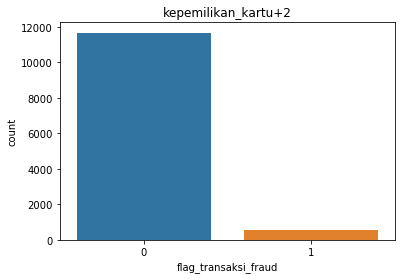

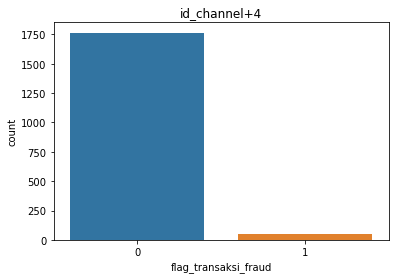

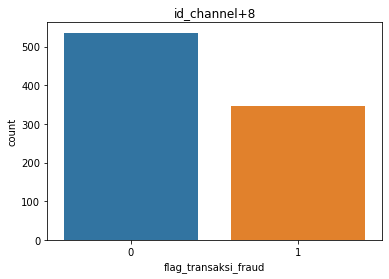

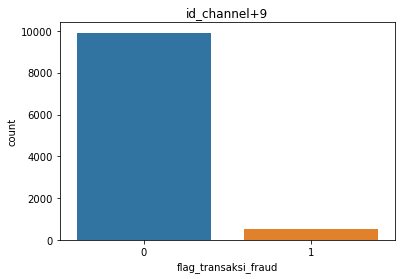

In [ ]:
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    sns.countplot(dfTrain[dfTrain[i.split('+')[0]] == int(i.split('+')[1])]['flag_transaksi_fraud'])
    plt.title(i)
    plt.show()

In [ ]:
from scipy.stats import mannwhitneyu
mann = []
for i in dfTrain.select_dtypes('number').columns:
    if mannwhitneyu(dfTrain[dfTrain['flag_transaksi_fraud'] == 0][i],
                    dfTrain[dfTrain['flag_transaksi_fraud'] == 1][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [list(dfTrain.select_dtypes('number').columns), mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,nilai_transaksi,Reject Null Hypothesis
1,waktu_transaksi,Reject Null Hypothesis
2,rata_rata_nilai_transaksi,Fail to Reject Null Hypothesis
3,maksimum_nilai_transaksi,Reject Null Hypothesis
4,minimum_nilai_transaksi,Reject Null Hypothesis
5,rata_rata_jumlah_transaksi,Reject Null Hypothesis
6,flag_transaksi_fraud,Reject Null Hypothesis


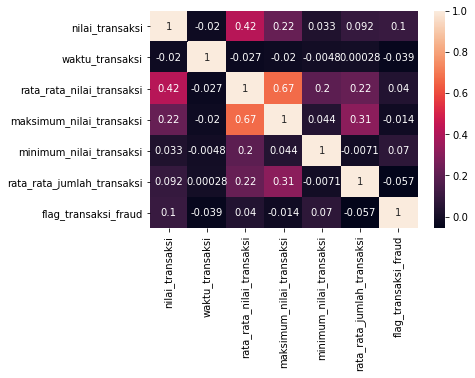

In [ ]:
sns.heatmap(dfTrain.corr(), annot =True)

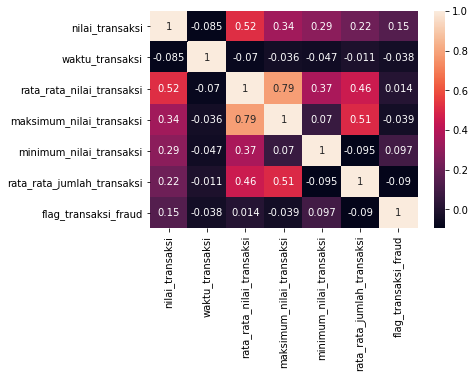

In [ ]:
sns.heatmap(dfTrain.corr('spearman'), annot =True)

In [ ]:
corr_cat = []
for i in categorical_columns:
    temp = []
    for j in categorical_columns:
        temp.append(cramers_v(dfTrain[i], dfTrain[j]))
    corr_cat.append(temp)

In [ ]:
corr_cat_res = pd.DataFrame(corr_cat, index = categorical_columns, columns = categorical_columns)

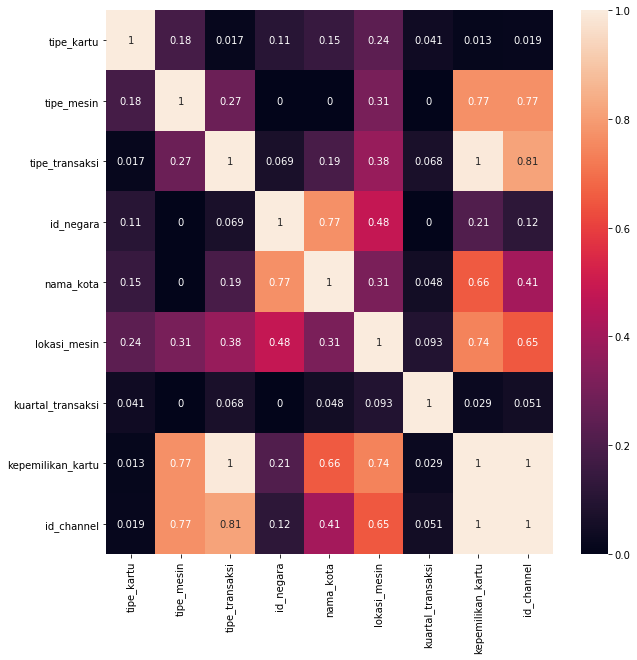

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_cat_res, annot = True)

In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['nama_kota'])
dfTrain_try_encode = encoder.fit_transform(dfTrain).copy()


In [ ]:
dfTrain_try_encode.head()

,tipe_kartu,tipe_mesin,tipe_transaksi,nilai_transaksi,id_negara,nama_kota_0,nama_kota_1,nama_kota_2,nama_kota_3,nama_kota_4,...,lokasi_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,111,2605127,26,2200000.0,96,0,0,0,0,0,...,4137,193955,4,2,9,1.332293e+06,9750000.0,10000.0,2.73,0
1,111,-3,156,2500000.0,96,0,0,0,0,0,...,1264,73140,2,1,8,1.369048e+06,10000000.0,30000.0,2.33,1
2,2,-3,156,1200000.0,96,0,0,0,0,0,...,1283,140216,3,1,8,1.552346e+07,100000000.0,41804.0,2.40,0
3,103,2806174,58,320000.0,96,0,0,0,0,0,...,7049,155117,3,2,4,7.117647e+05,6884408.0,10000.0,1.98,0
4,0,2334932,26,150000.0,96,0,0,0,0,0,...,3425,143339,3,2,9,6.179683e+05,2500000.0,100000.0,1.46,0


In [ ]:
dfTrain.head()

,tipe_kartu,tipe_mesin,tipe_transaksi,nilai_transaksi,id_negara,nama_kota,lokasi_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,111,2605127,26,2200000.0,96,265,4137,193955,4,2,9,1.332293e+06,9750000.0,10000.0,2.73,0
1,111,-3,156,2500000.0,96,121,1264,73140,2,1,8,1.369048e+06,10000000.0,30000.0,2.33,1
2,2,-3,156,1200000.0,96,101,1283,140216,3,1,8,1.552346e+07,100000000.0,41804.0,2.40,0
3,103,2806174,58,320000.0,96,239,7049,155117,3,2,4,7.117647e+05,6884408.0,10000.0,1.98,0
4,0,2334932,26,150000.0,96,69,3425,143339,3,2,9,6.179683e+05,2500000.0,100000.0,1.46,0


In [ ]:
dfTrain.select_dtypes('number')

,nilai_transaksi,waktu_transaksi,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,2200000.0,193955,1.332293e+06,9750000.0,10000.0,2.73,0
1,2500000.0,73140,1.369048e+06,10000000.0,30000.0,2.33,1
2,1200000.0,140216,1.552346e+07,100000000.0,41804.0,2.40,0
3,320000.0,155117,7.117647e+05,6884408.0,10000.0,1.98,0
4,150000.0,143339,6.179683e+05,2500000.0,100000.0,1.46,0
...,...,...,...,...,...,...,...
13120,100000.0,140547,2.917987e+06,7400000.0,26500.0,2.57,0
13121,2500000.0,172446,1.914437e+06,20000000.0,100000.0,2.73,0
13122,1250000.0,141836,3.417045e+05,1000000.0,100000.0,1.33,1
13123,500000.0,71451,7.644508e+05,3000000.0,25000.0,1.62,0


In [ ]:
dfTrain_dummies = pd.get_dummies(data = dfTrain, columns = list(dfTrain.select_dtypes('object')))

In [ ]:
dfTrain_dummies.head()

,nilai_transaksi,waktu_transaksi,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,tipe_kartu_0,tipe_kartu_1,tipe_kartu_2,...,kuartal_transaksi_1,kuartal_transaksi_2,kuartal_transaksi_3,kuartal_transaksi_4,kepemilikan_kartu_1,kepemilikan_kartu_2,id_channel_3,id_channel_4,id_channel_8,id_channel_9
0,2200000.0,193955,1.332293e+06,9750000.0,10000.0,2.73,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2500000.0,73140,1.369048e+06,10000000.0,30000.0,2.33,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1200000.0,140216,1.552346e+07,100000000.0,41804.0,2.40,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,320000.0,155117,7.117647e+05,6884408.0,10000.0,1.98,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,150000.0,143339,6.179683e+05,2500000.0,100000.0,1.46,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
significant_chi = []
for i in res_chi[res_chi['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    significant_chi.append('{}_{}'.format(i.split('+')[0],i.split('+')[1]))

In [ ]:
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Columns']:
    significant_chi.append(i)

In [ ]:
dfTrain_sig = dfTrain_dummies[significant_chi].copy()

In [ ]:
dfTrain_sig

,tipe_kartu_4,tipe_kartu_93,tipe_transaksi_26,tipe_transaksi_58,tipe_transaksi_148,tipe_transaksi_156,tipe_transaksi_158,tipe_transaksi_159,tipe_transaksi_238,tipe_transaksi_385,...,kepemilikan_kartu_2,id_channel_4,id_channel_8,id_channel_9,nilai_transaksi,waktu_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,2200000.0,193955,9750000.0,10000.0,2.73,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,2500000.0,73140,10000000.0,30000.0,2.33,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1200000.0,140216,100000000.0,41804.0,2.40,0
3,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,320000.0,155117,6884408.0,10000.0,1.98,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,150000.0,143339,2500000.0,100000.0,1.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13120,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,100000.0,140547,7400000.0,26500.0,2.57,0
13121,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,2500000.0,172446,20000000.0,100000.0,2.73,0
13122,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1250000.0,141836,1000000.0,100000.0,1.33,1
13123,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,500000.0,71451,3000000.0,25000.0,1.62,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(dfTrain_sig.drop('flag_transaksi_fraud', axis =1), dfTrain_sig['flag_transaksi_fraud'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

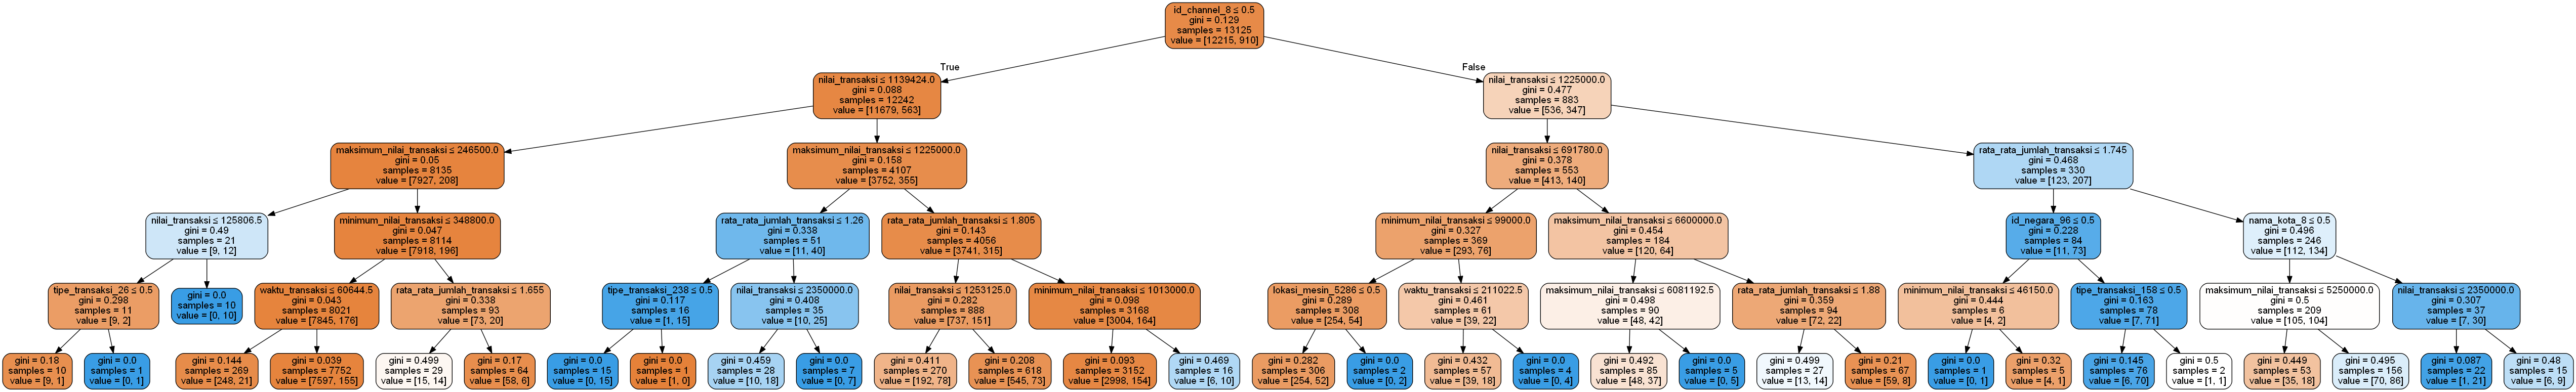

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True, feature_names = dfTrain_sig.drop('flag_transaksi_fraud', axis =1).columns,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(dfTrain_sig.drop('flag_transaksi_fraud', axis = 1).values,
                                 j) for j in range(dfTrain_sig.drop('flag_transaksi_fraud', axis =1).shape[1])]
vif_res = pd.Series(vif, index = dfTrain_sig.drop('flag_transaksi_fraud', axis = 1).columns, name ='VIF')
vif_res

C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


tipe_kartu_4                    1.011058
tipe_kartu_93                   1.286674
tipe_transaksi_26               3.096780
tipe_transaksi_58               9.703711
tipe_transaksi_148              1.278435
tipe_transaksi_156            113.984258
tipe_transaksi_158              2.444632
tipe_transaksi_159              1.967370
tipe_transaksi_238              1.737066
tipe_transaksi_385              2.907593
tipe_transaksi_440              6.262514
id_negara_-2                    1.295772
id_negara_73                    1.588007
id_negara_96                    2.394990
id_negara_149                   1.537630
nama_kota_1                     1.104902
nama_kota_7                     1.019681
nama_kota_8                     1.228297
nama_kota_51                    1.036543
nama_kota_78                    1.206838
nama_kota_80                    1.005034
nama_kota_128                   1.020491
nama_kota_133                   1.066584
nama_kota_153                   1.003394
nama_kota_214   

In [ ]:
vif_drop = []
for idx, val in zip(vif_res.index, vif_res):
    if val> 10:
        vif_drop.append(idx)

In [ ]:
dfTrain_sig.drop(vif_drop, axis = 1, inplace =True)

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(dfTrain_sig['flag_transaksi_fraud'],sm.add_constant(dfTrain_sig.drop('flag_transaksi_fraud', axis =1)))
result=logit_model.fit()
print(result.summary())

         Current function value: inf
         Iterations: 35


C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(dfTrain_sig.drop('flag_transaksi_fraud', axis =1), dfTrain_sig['flag_transaksi_fraud'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pd.Series(log_model.coef_.flatten(), index =dfTrain_sig.drop('flag_transaksi_fraud', axis =1).columns)

tipe_kartu_4                 -9.331794e-13
tipe_kartu_93                -9.227152e-12
tipe_transaksi_26            -4.544676e-11
tipe_transaksi_58            -2.322184e-11
tipe_transaksi_148           -5.568005e-12
tipe_transaksi_158            4.885110e-13
tipe_transaksi_159           -1.409431e-11
tipe_transaksi_238           -1.084814e-11
tipe_transaksi_385           -3.697145e-11
tipe_transaksi_440            1.052948e-12
id_negara_-2                  2.051654e-13
id_negara_73                  3.524741e-13
id_negara_96                 -1.334615e-10
id_negara_149                 2.359773e-13
nama_kota_1                   5.264500e-13
nama_kota_7                   3.426332e-13
nama_kota_8                   3.542234e-12
nama_kota_51                  7.321330e-13
nama_kota_78                  1.334319e-13
nama_kota_80                  2.517370e-13
nama_kota_128                -6.065982e-11
nama_kota_133                 1.856686e-13
nama_kota_153                 1.731784e-13
nama_kota_2

## K-Fold

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [ ]:
data = dfTrain_sig.drop('flag_transaksi_fraud', axis =1)
target = dfTrain_sig['flag_transaksi_fraud']

In [ ]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report,
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import KFold
K = 5
kf =KFold(n_splits = K, shuffle = True, random_state = 42)

In [ ]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):

    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    #instantiate model
    logmodel = LogisticRegression()

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)

    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [ ]:
train_errors

[{'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9771\n           1       0.33      0.02      0.03       729\n\n    accuracy                           0.93     10500\n   macro avg       0.63      0.51      0.50     10500\nweighted avg       0.89      0.93      0.90     10500\n',
  'matthew': 0.06089836598554041,
  'f1': 0.49737641535487437,
  'roc': 0.5833394051628661,
  'accuracy': 0.9294285714285714,
  'confusion': array([[9747,   24],
         [ 717,   12]], dtype=int64),
  'logloss': 0.26514956206891815},
 {'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9762\n           1       0.41      0.02      0.04       738\n\n    accuracy                           0.93     10500\n   macro avg       0.67      0.51      0.50     10500\nweighted avg       0.89      0.93      0.90     10500\n',
  'matthew': 0.0761385847692318,
  'f1': 0.49974436501601943,
  '

In [ ]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('ROC AUC Train ke {} : {}'.format(i, tr_err['roc']))
    print('ROC AUC Validation ke {} : {}'.format(i, val_err['roc']))

ROC AUC Train ke 1 : 0.5833394051628661
ROC AUC Validation ke 1 : 0.5874732121058676
ROC AUC Train ke 2 : 0.5779453430674442
ROC AUC Validation ke 2 : 0.6051702234568018
ROC AUC Train ke 3 : 0.5834605478095132
ROC AUC Validation ke 3 : 0.5899373993761872
ROC AUC Train ke 4 : 0.5797627199204609
ROC AUC Validation ke 4 : 0.5963981967548404
ROC AUC Train ke 5 : 0.5940161562496202
ROC AUC Validation ke 5 : 0.5371224290092684


In [ ]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('Accuracy Train ke {} : {}'.format(i, tr_err['accuracy']))
    print('Accuracy Validation ke {} : {}'.format(i, val_err['accuracy']))

Accuracy Train ke 1 : 0.9294285714285714
Accuracy Validation ke 1 : 0.9306666666666666
Accuracy Train ke 2 : 0.9291428571428572
Accuracy Validation ke 2 : 0.9325714285714286
Accuracy Train ke 3 : 0.93
Accuracy Validation ke 3 : 0.928
Accuracy Train ke 4 : 0.9306666666666666
Accuracy Validation ke 4 : 0.9264761904761905
Accuracy Train ke 5 : 0.9295238095238095
Accuracy Validation ke 5 : 0.9306666666666666


In [ ]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print(f'Report Train ke {i} :')
    print(tr_err['report'])
    print(f'Report Validation ke {i} :')
    print(val_err['report'])

Report Train ke 1 :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9771
           1       0.33      0.02      0.03       729

    accuracy                           0.93     10500
   macro avg       0.63      0.51      0.50     10500
weighted avg       0.89      0.93      0.90     10500

Report Validation ke 1 :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2444
           1       0.47      0.04      0.07       181

    accuracy                           0.93      2625
   macro avg       0.70      0.52      0.52      2625
weighted avg       0.90      0.93      0.90      2625

Report Train ke 2 :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9762
           1       0.41      0.02      0.04       738

    accuracy                           0.93     10500
   macro avg       0.67      0.51      0.50     10500
weighted 

In [ ]:
train_errors

[{'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9771\n           1       0.33      0.02      0.03       729\n\n    accuracy                           0.93     10500\n   macro avg       0.63      0.51      0.50     10500\nweighted avg       0.89      0.93      0.90     10500\n',
  'matthew': 0.06089836598554041,
  'f1': 0.49737641535487437,
  'roc': 0.5833394051628661,
  'accuracy': 0.9294285714285714,
  'confusion': array([[9747,   24],
         [ 717,   12]], dtype=int64),
  'logloss': 0.26514956206891815},
 {'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9762\n           1       0.41      0.02      0.04       738\n\n    accuracy                           0.93     10500\n   macro avg       0.67      0.51      0.50     10500\nweighted avg       0.89      0.93      0.90     10500\n',
  'matthew': 0.0761385847692318,
  'f1': 0.49974436501601943,
  '

In [ ]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                   j['roc'], i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy',
                                              'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score',
                                'Test F1 Score', 'Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())

average_mat = pd.DataFrame(average).T
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score',
                                'Test F1 Score', 'Train Matthews Corr Coef',
                       'Test Matthews Corr Coef' , 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.929429,0.930667,0.583339,0.587473,0.497376,0.517709,0.060898,0.118997,0.265150,0.262919
2 Iteration,0.929143,0.932571,0.577945,0.605170,0.499744,0.498927,0.076139,0.054320,0.268181,0.250903
3 Iteration,0.930000,0.928000,0.583461,0.589937,0.502697,0.496690,0.075519,0.065293,0.263456,0.269699
4 Iteration,0.930667,0.926476,0.579763,0.596398,0.500538,0.495970,0.070367,0.078212,0.263156,0.270876
5 Iteration,0.929524,0.930667,0.594016,0.537122,0.502434,0.492783,0.081574,0.036207,0.263348,0.270120
Average,0.929752,0.929676,0.583705,0.583220,0.500558,0.500416,0.072899,0.070606,0.264658,0.264903


In [ ]:
from tpot import TPOTClassifier

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
tpot = TPOTClassifier(verbosity = 2, warm_start = True, scoring = 'f1')

In [ ]:
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.3421079092346561
Generation 2 - Current best internal CV score: 0.3624015880385681
Generation 3 - Current best internal CV score: 0.3624015880385681
Generation 4 - Current best internal CV score: 0.3624015880385681
